In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import PrecisionRecallDisplay
from sklearn import metrics

df = pd.read_csv('6 class csv.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [3]:
df['Star type'].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64

In [4]:
df['Spectral Class'].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral Class, dtype: int64

In [5]:
df['Star color'].value_counts()

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: Star color, dtype: int64

<AxesSubplot:xlabel='Temperature (K)'>

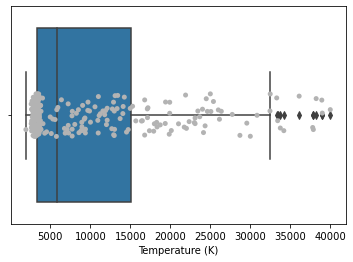

In [16]:
sns.boxplot(data=df, x='Temperature (K)')
sns.stripplot(data=df, x='Temperature (K)', color =".7")

<AxesSubplot:xlabel='Luminosity(L/Lo)'>

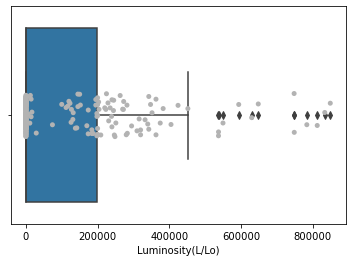

In [15]:
sns.boxplot(data=df, x='Luminosity(L/Lo)')
sns.stripplot(data=df, x='Luminosity(L/Lo)', color =".7")

<AxesSubplot:xlabel='Absolute magnitude(Mv)'>

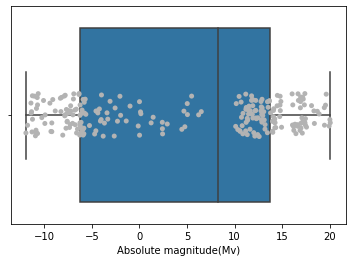

In [12]:
sns.boxplot(data=df, x='Absolute magnitude(Mv)')
sns.stripplot(data=df, x='Absolute magnitude(Mv)', color =".7")

<AxesSubplot:xlabel='Radius(R/Ro)'>

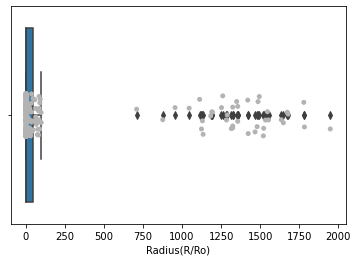

In [17]:
sns.boxplot(data=df, x='Radius(R/Ro)')
sns.stripplot(data=df, x='Radius(R/Ro)', color =".7")

In [19]:
#changes all to int
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

for col in df.columns:
    df[col] = enc.fit(df[col]).transform(df[col])
    
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
count,240.000000,240.000000,240.000000,240.00000,240.000000,240.000000,240.000000
mean,110.612500,100.558333,107.629167,113.82500,2.500000,7.250000,3.758333
std,65.866575,60.861706,62.236087,65.84007,1.711394,4.926659,2.090007
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,54.750000,48.750000,55.750000,56.75000,1.000000,2.000000,1.000000
50%,107.500000,98.500000,106.500000,115.50000,2.500000,10.000000,5.000000
75%,167.250000,154.250000,160.250000,170.25000,4.000000,10.000000,5.000000
max,227.000000,207.000000,215.000000,227.00000,5.000000,18.000000,6.000000


In [ ]:
#splitting into target and predictor variables
x = df.drop(['Star type'], axis = 1) # we will use all colums except target
y = df['Star type'] # this is our target value

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

In [ ]:
### DECISION TREE ###

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#training split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=3162)

DecisionTreeClassifier_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('DecisionTreeClassifier', DecisionTreeClassifier(max_depth=4))

])

DecisionTreeClassifier_pipe.fit(xtrain, ytrain)
DecisionTreeClassifier_pipe.score(xtest, ytest)



In [ ]:
y_pred = DecisionTreeClassifier_pipe.predict(xtest)

matrix = confusion_matrix(ytest, y_pred)
sns.heatmap(
    matrix/np.sum(matrix),
    annot=True,
    cmap='Blues',
    fmt='.2%'
)

In [ ]:
report_DTC = metrics.classification_report(ytest, y_pred)
print(report_DTC)

In [ ]:
###NAIVE BAYES###

from sklearn.naive_bayes import GaussianNB

#training split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=3132)

gnb_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('gnb', GaussianNB())
])
print("Number of mislabeled points out of a total %d points : %d"   % (xtest.shape[0], (ytest != y_pred).sum()))

gnb_pipe.fit(xtrain, ytrain)
gnb_pipe.score(xtest, ytest)

In [ ]:
y_pred = gnb_pipe.predict(xtest)

matrix = confusion_matrix(ytest, y_pred)
sns.heatmap(
    matrix/np.sum(matrix),
    annot=True,
    cmap='Blues',
    fmt='.2%'
)

In [ ]:
report_gnb = metrics.classification_report(ytest, y_pred)
print(report_gnb)

In [ ]:
###RANDOM FOREST###

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
                                                

rfc_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rfc', RandomForestClassifier(max_depth=4, random_state=2))
])

rfc_pipe.fit(xtrain, ytrain)
rfc_pipe.score(xtest, ytest)

In [ ]:
report_rf = metrics.classification_report(ytest, y_pred)
print(report_rf)

In [ ]:
### KNN ###

from sklearn.neighbors import KNeighborsClassifier

#training split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=3462)

knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

knn_pipe.fit(xtrain, ytrain)
knn_pipe.score(xtest, ytest)

In [ ]:
y_pred = knn_pipe.predict(xtest)

matrix = confusion_matrix(ytest, y_pred)
sns.heatmap(
    matrix/np.sum(matrix),
    annot=True,
    cmap='Blues',
    fmt='.2%'
)

In [ ]:
report_knn = metrics.classification_report(ytest, y_pred)
print(report_knn)

In [ ]:
### SVC ###

#training split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=3122)

from sklearn.svm import SVC
svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

svm_pipe.fit(xtrain, ytrain)
svm_pipe.score(xtest, ytest)

In [ ]:
y_pred = svm_pipe.predict(xtest)

matrix = confusion_matrix(ytest, y_pred)
sns.heatmap(
    matrix/np.sum(matrix),
    annot=True,
    cmap='Blues',
    fmt='.2%'
)

In [ ]:
report_svc = metrics.classification_report(ytest, y_pred)
print(report_svc)